#### Import the pandas and warnings packages and reading the files

In [76]:
import pandas as pd
import warnings
warnings.filterwarnings(action='once')

#### Import the required datatime package

In [77]:
import datetime
from datetime import timedelta

Read the following files:

- airlines.csv
- airports.csv
- flights.csv
- planes.csv
- weather.csv

In [78]:
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')
flights = pd.read_csv('flights.csv')
planes = pd.read_csv('planes.csv')
weather = pd.read_csv('weather.csv')

In [79]:
airlines.head()

,Unnamed: 0,carrier,name
0,1,9E,Endeavor Air Inc.
1,2,AA,American Airlines Inc.
2,3,AS,Alaska Airlines Inc.
3,4,B6,JetBlue Airways
4,5,DL,Delta Air Lines Inc.


In [80]:
print("The airlines files has {:d} rows".format(airlines.shape[0]))
print("The airports files has {:d} rows".format(airports.shape[0]))
print("The flights files has {:d} rows".format(flights.shape[0]))
print("The planes files has {:d} rows".format(planes.shape[0]))
print("The weather files has {:d} rows".format(weather.shape[0]))

The airlines files has 16 rows
The airports files has 1458 rows
The flights files has 336776 rows
The planes files has 3322 rows
The weather files has 26130 rows


# After reading the files I will use the following steps:
1. I want to create file with arrival times and destinations only

2. To do that I will perform a series of ata manipulations shown below

3. The essential idea is to get data in form that can be ingested by the datetime function

4. Haved the data avalible to use. I will identify the five busiest airportw based on the number of arrivals per day

6. create five separate datasets for each of the five airports

7. Finally, provide the answers in the format requested

#### Start by investigating the relevant dataset

In [81]:
flights.head()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


#### Keep the required fields only

In [82]:
flights = flights[['year', 'month', 'day', 'arr_time', 'dest']]
flights.head()

,year,month,day,arr_time,dest
0,2013,1,1,830.0,IAH
1,2013,1,1,850.0,IAH
2,2013,1,1,923.0,MIA
3,2013,1,1,1004.0,BQN
4,2013,1,1,812.0,ATL


#### Identify if there are any missing values or NaNs in the dataset

In [83]:
flights.isnull().sum() 

year           0
month          0
day            0
arr_time    8713
dest           0
dtype: int64

#### Clearly the only NaNs are in the arr_time column, So delete those rows

In [84]:
flights = flights[pd.notnull(flights['arr_time'])]
flights.isnull().sum() 

year        0
month       0
day         0
arr_time    0
dest        0
dtype: int64

#### The next three steps are required to
- convert arr_time to int
- then to string
- then to pad the left by a zero

to ensure that there are two numbers for hours and two numbers for minutes

#### Convert arr_time to int

In [85]:
flights.arr_time = flights.arr_time.astype(int)
flights.head()

,year,month,day,arr_time,dest
0,2013,1,1,830,IAH
1,2013,1,1,850,IAH
2,2013,1,1,923,MIA
3,2013,1,1,1004,BQN
4,2013,1,1,812,ATL


#### Convert arr_time to str

In [86]:
flights.arr_time = flights.arr_time.astype(str)
flights.head()

,year,month,day,arr_time,dest
0,2013,1,1,830,IAH
1,2013,1,1,850,IAH
2,2013,1,1,923,MIA
3,2013,1,1,1004,BQN
4,2013,1,1,812,ATL


#### Pad arr_time on the left with zero nd ensure a 4 character string
- first two characters for hour
- last two characters for minutes

In [87]:
flights['arr_time'] = flights['arr_time'].str.pad(4, side='left', fillchar='0')
#flights.arr_time = flights.zfill(flights.arr_time)
flights.head()

,year,month,day,arr_time,dest
0,2013,1,1,0830,IAH
1,2013,1,1,0850,IAH
2,2013,1,1,0923,MIA
3,2013,1,1,1004,BQN
4,2013,1,1,0812,ATL


In [88]:
flights.month = flights.month.astype(str)
flights['month'] = flights['month'].str.pad(2, side='left', fillchar='0')
flights.head()

,year,month,day,arr_time,dest
0,2013,01,1,0830,IAH
1,2013,01,1,0850,IAH
2,2013,01,1,0923,MIA
3,2013,01,1,1004,BQN
4,2013,01,1,0812,ATL


#### Now ensure that month is of two characters length, pad with 0, if needed

In [89]:
flights.day = flights.day.astype(str)
flights['day'] = flights['day'].str.pad(2, side='left', fillchar='0')
flights.head()

,year,month,day,arr_time,dest
0,2013,01,01,0830,IAH
1,2013,01,01,0850,IAH
2,2013,01,01,0923,MIA
3,2013,01,01,1004,BQN
4,2013,01,01,0812,ATL


#### Now ensure that day is of two characters length, pad with 0, if needed

In [90]:
flights['hour'] = flights.arr_time.str[:2]
flights['mins'] = flights.arr_time.str[2:]
flights.head()

,year,month,day,arr_time,dest,hour,mins
0,2013,01,01,0830,IAH,08,30
1,2013,01,01,0850,IAH,08,50
2,2013,01,01,0923,MIA,09,23
3,2013,01,01,1004,BQN,10,04
4,2013,01,01,0812,ATL,08,12


#### Concatenate year, month, and day into a separte string variable called ymd. Note that this is done in two steps

In [91]:
flights['ym'] = flights.year.astype(str).str.cat(flights.month.astype(str), sep='-')
flights['ymd'] = flights.ym.astype(str).str.cat(flights.day.astype(str), sep='-')
flights.head()

,year,month,day,arr_time,dest,hour,mins,ym,ymd
0,2013,01,01,0830,IAH,08,30,2013-01,2013-01-01
1,2013,01,01,0850,IAH,08,50,2013-01,2013-01-01
2,2013,01,01,0923,MIA,09,23,2013-01,2013-01-01
3,2013,01,01,1004,BQN,10,04,2013-01,2013-01-01
4,2013,01,01,0812,ATL,08,12,2013-01,2013-01-01


#### Concatenate hour and mins into a separte string variable called hm

In [92]:
flights['hm'] = flights.hour.astype(str).str.cat(flights.mins.astype(str), sep=':')
flights.head()

,year,month,day,arr_time,dest,hour,mins,ym,ymd,hm
0,2013,01,01,0830,IAH,08,30,2013-01,2013-01-01,08:30
1,2013,01,01,0850,IAH,08,50,2013-01,2013-01-01,08:50
2,2013,01,01,0923,MIA,09,23,2013-01,2013-01-01,09:23
3,2013,01,01,1004,BQN,10,04,2013-01,2013-01-01,10:04
4,2013,01,01,0812,ATL,08,12,2013-01,2013-01-01,08:12


#### Now, concatenate ymd and hm into the variable called arr_date_time

In [93]:
flights['arr_date_time'] = flights.ymd.astype(str).str.cat(flights.hm.astype(str), sep=' ')
flights.head()

,year,month,day,arr_time,dest,hour,mins,ym,ymd,hm,arr_date_time
0,2013,01,01,0830,IAH,08,30,2013-01,2013-01-01,08:30,2013-01-01 08:30
1,2013,01,01,0850,IAH,08,50,2013-01,2013-01-01,08:50,2013-01-01 08:50
2,2013,01,01,0923,MIA,09,23,2013-01,2013-01-01,09:23,2013-01-01 09:23
3,2013,01,01,1004,BQN,10,04,2013-01,2013-01-01,10:04,2013-01-01 10:04
4,2013,01,01,0812,ATL,08,12,2013-01,2013-01-01,08:12,2013-01-01 08:12


#### Finally, create a variable called arrtime by converting the arr_date_time into the date format. Make sure that coerce the formation of this column; otherwise errors will result.

In [94]:
flights['arrtime'] = pd.to_datetime(flights['arr_date_time'], format ='%Y-%m-%d %H:%M', errors='coerce')
flights.head()

,year,month,day,arr_time,dest,hour,mins,ym,ymd,hm,arr_date_time,arrtime
0,2013,01,01,0830,IAH,08,30,2013-01,2013-01-01,08:30,2013-01-01 08:30,2013-01-01 08:30:00
1,2013,01,01,0850,IAH,08,50,2013-01,2013-01-01,08:50,2013-01-01 08:50,2013-01-01 08:50:00
2,2013,01,01,0923,MIA,09,23,2013-01,2013-01-01,09:23,2013-01-01 09:23,2013-01-01 09:23:00
3,2013,01,01,1004,BQN,10,04,2013-01,2013-01-01,10:04,2013-01-01 10:04,2013-01-01 10:04:00
4,2013,01,01,0812,ATL,08,12,2013-01,2013-01-01,08:12,2013-01-01 08:12,2013-01-01 08:12:00


#### Keep only the variables that relevant to futher analysis

In [95]:
flights = flights[['arrtime', 'dest']]
flights.head()

,arrtime,dest
0,2013-01-01 08:30:00,IAH
1,2013-01-01 08:50:00,IAH
2,2013-01-01 09:23:00,MIA
3,2013-01-01 10:04:00,BQN
4,2013-01-01 08:12:00,ATL


#### Identify how many malformed instances of the arrtime variable there are

In [96]:
flights.isnull().sum() 

arrtime    150
dest         0
dtype: int64

#### Delete those malformed instances to obtain a clean dataset

In [97]:
flights = flights[pd.notnull(flights['arrtime'])]
flights.isnull().sum() 

arrtime    0
dest       0
dtype: int64

#### Ready to identify the busiest airports in the list based on arrivals. First step is to list the unique destination airports

In [98]:
flights.dest.unique()

array(['IAH', 'MIA', 'BQN', 'ATL', 'ORD', 'FLL', 'IAD', 'MCO', 'PBI',
       'TPA', 'LAX', 'SFO', 'DFW', 'BOS', 'LAS', 'MSP', 'DTW', 'RSW',
       'SJU', 'PHX', 'BWI', 'CLT', 'BUF', 'DEN', 'SNA', 'MSY', 'SLC',
       'XNA', 'MKE', 'SEA', 'ROC', 'SYR', 'SRQ', 'RDU', 'CMH', 'JAX',
       'CHS', 'MEM', 'PIT', 'SAN', 'DCA', 'CLE', 'STL', 'MYR', 'JAC',
       'MDW', 'HNL', 'BNA', 'AUS', 'BTV', 'PHL', 'STT', 'EGE', 'AVL',
       'PWM', 'IND', 'SAV', 'CAK', 'HOU', 'LGB', 'DAY', 'ALB', 'BDL',
       'MHT', 'MSN', 'GSO', 'CVG', 'BUR', 'RIC', 'GSP', 'GRR', 'MCI',
       'ORF', 'SAT', 'SDF', 'PDX', 'SJC', 'OMA', 'CRW', 'OAK', 'SMF',
       'TUL', 'TYS', 'PVD', 'DSM', 'PSE', 'BHM', 'OKC', 'CAE', 'HDN',
       'BZN', 'MTJ', 'EYW', 'PSP', 'ACK', 'BGR', 'ABQ', 'ILM', 'MVY',
       'SBN', 'LEX', 'CHO', 'TVC', 'ANC'], dtype=object)

#### Count the number of arrivals at airports and sort them
The top five values give you the busiest airports, w.r.t. number of arrivals per day 

In [99]:
pd.value_counts(flights['dest'].values, sort=True).head(5)
# if you want to see all values, remove the head() option from this command

ATL    16871
ORD    16607
LAX    16047
BOS    15020
MCO    13973
dtype: int64

#### Create five different datasets for the top five (busiest) airports

In [100]:
ATL = flights[flights['dest'] == 'ATL']
ORD = flights[flights['dest'] == 'ORD']
LAX = flights[flights['dest'] == 'LAX']
BOS = flights[flights['dest'] == 'BOS']
MCO = flights[flights['dest'] == 'MCO']

#### I will show detailes steps for ATL for obtaining interarrival times in minutes
- Compute inter-arrival time for each airport file after sorting each file by date and arrival time
- Convert that time to seconds
- Convert seconds into minutes (by dividing by 60)

#### Use the diff function to obtain interarrival time in time format

In [101]:
iatATL = ATL.sort_values(by=['arrtime'])
iatATL['iat'] = iatATL['arrtime'].diff()
iatATL.head()

,arrtime,dest,iat
4,2013-01-01 08:12:00,ATL,NaT
29,2013-01-01 08:33:00,ATL,00:21:00
18,2013-01-01 08:37:00,ATL,00:04:00
23,2013-01-01 08:37:00,ATL,00:00:00
62,2013-01-01 09:44:00,ATL,01:07:00


#### Convert time into seconds

In [102]:
# Get arrival difference time in seconds
iatATL["iat_seconds"] = iatATL['iat'].dt.total_seconds()
iatATL.head()

,arrtime,dest,iat,iat_seconds
4,2013-01-01 08:12:00,ATL,NaT,NaN
29,2013-01-01 08:33:00,ATL,00:21:00,1260.0
18,2013-01-01 08:37:00,ATL,00:04:00,240.0
23,2013-01-01 08:37:00,ATL,00:00:00,0.0
62,2013-01-01 09:44:00,ATL,01:07:00,4020.0


#### Convert seconds into minutes

In [103]:
# Get arrival difference time in minutes
iatATL["iat_mins"] = iatATL['iat_seconds']/60
iatATL.head()

,arrtime,dest,iat,iat_seconds,iat_mins
4,2013-01-01 08:12:00,ATL,NaT,NaN,NaN
29,2013-01-01 08:33:00,ATL,00:21:00,1260.0,21.0
18,2013-01-01 08:37:00,ATL,00:04:00,240.0,4.0
23,2013-01-01 08:37:00,ATL,00:00:00,0.0,0.0
62,2013-01-01 09:44:00,ATL,01:07:00,4020.0,67.0


#### Obtain descriptive statistics for ATL

In [104]:
iatATL.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
iat,16870,0 days 00:31:07.102548,0 days 01:14:48.856903,0 days 00:00:00,0 days 00:07:00,0 days 00:16:00,0 days 00:30:00,0 days 21:56:00
iat_seconds,16870,1867.1,4488.86,0,420,960,1800,78960
iat_mins,16870,31.1184,74.8143,0,7,16,30,1316


In [105]:
print ('ATL: Mean = {0:.3f} and SD = {1:.3f}'.format(float(iatATL[['iat_mins']].mean()), 
                                                     float(iatATL[['iat_mins']].std())))

ATL: Mean = 31.118 and SD = 74.814


#### Now to plotting using seaborn

In [106]:
import seaborn as sns
%matplotlib inline

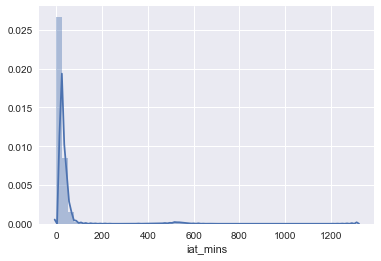

In [107]:
warnings.filterwarnings('ignore')
iatATL = iatATL.dropna()
sns.distplot(iatATL['iat_mins']);

#### Most of interarrival time of ATL is before 200 mins

#### Plot again using the less extreme data

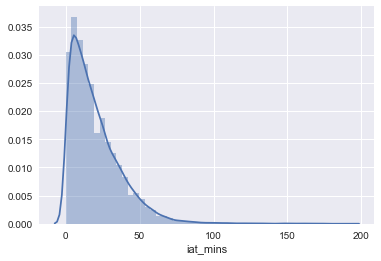

In [108]:
warnings.filterwarnings('ignore')
iatATLreduced = iatATL[iatATL['iat_mins'] <= 200]
sns.distplot(iatATLreduced['iat_mins'])

#### The interarrival time of ATL allocatd between 0 to 100. It means most of interarrival time of ATL are less than an hour which is a kind of short period for customer waiting. A distribution that is skewed right, the mean is typically greater than the median. 

In [109]:
iatORD = ORD.sort_values(by=['arrtime'])
iatORD['iat'] = iatORD['arrtime'].diff()

# Get arrival difference time in seconds
iatORD["iat_seconds"] = iatORD['iat'].dt.total_seconds()

# Get arrival difference time in minutes
iatORD["iat_mins"] = iatORD['iat_seconds']/60

iatORD.describe().transpose()
iatORD = iatORD.dropna()

iatORD.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
iat,16606,0 days 00:31:37.266048,0 days 01:14:01.643826,0 days 00:00:00,0 days 00:07:00,0 days 00:16:00,0 days 00:30:00,0 days 20:06:00
iat_seconds,16606,1897.27,4441.64,0,420,960,1800,72360
iat_mins,16606,31.6211,74.0274,0,7,16,30,1206


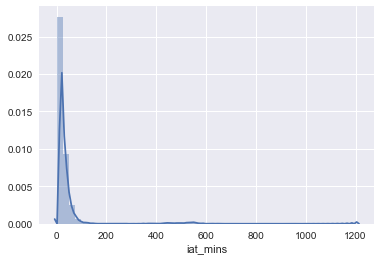

In [110]:
warnings.filterwarnings('ignore')
sns.distplot(iatORD['iat_mins']);

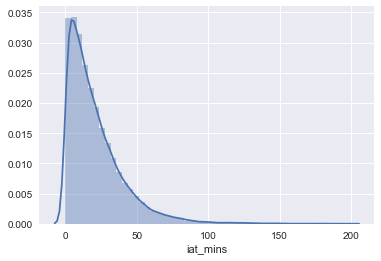

In [113]:
warnings.filterwarnings('ignore')
iatORDreduced = iatORD[iatORD['iat_mins'] <= 200]
sns.distplot(iatORDreduced['iat_mins'])

In [114]:
iatLAX = LAX.sort_values(by=['arrtime'])
iatLAX['iat'] = iatLAX['arrtime'].diff()

# Get arrival difference time in seconds
iatLAX["iat_seconds"] = iatLAX['iat'].dt.total_seconds()

# Get arrival difference time in minutes
iatLAX["iat_mins"] = iatLAX['iat_seconds']/60

iatLAX.describe().transpose()
iatLAX = iatLAX.dropna()

iatLAX.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
iat,16046,0 days 00:32:45.218746,0 days 01:10:49.087066,0 days 00:00:00,0 days 00:07:00,0 days 00:17:00,0 days 00:34:00,0 days 11:37:00
iat_seconds,16046,1965.22,4249.09,0,420,1020,2040,41820
iat_mins,16046,32.7536,70.8181,0,7,17,34,697


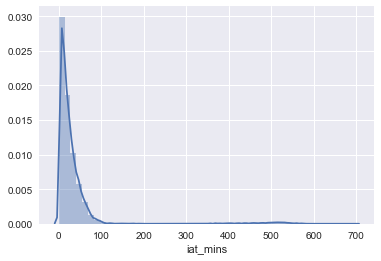

In [115]:
warnings.filterwarnings('ignore')
sns.distplot(iatLAX['iat_mins']);

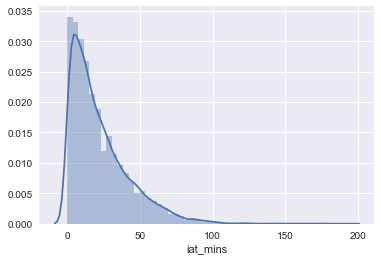

In [116]:
warnings.filterwarnings('ignore')
iatLAXreduced = iatLAX[iatLAX['iat_mins'] <= 200]
sns.distplot(iatLAXreduced['iat_mins'])

In [117]:
iatBOS = BOS.sort_values(by=['arrtime'])
iatBOS['iat'] = iatBOS['arrtime'].diff()

# Get arrival difference time in seconds
iatBOS["iat_seconds"] = iatBOS['iat'].dt.total_seconds()

# Get arrival difference time in minutes
iatBOS["iat_mins"] = iatBOS['iat_seconds']/60

iatBOS.describe().transpose()
iatBOS = iatBOS.dropna()

iatBOS.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
iat,15019,0 days 00:34:57.599041,0 days 01:07:35.818239,0 days 00:00:00,0 days 00:08:00,0 days 00:19:00,0 days 00:38:00,1 days 10:03:00
iat_seconds,15019,2097.6,4055.82,0,480,1140,2280,122580
iat_mins,15019,34.96,67.597,0,8,19,38,2043


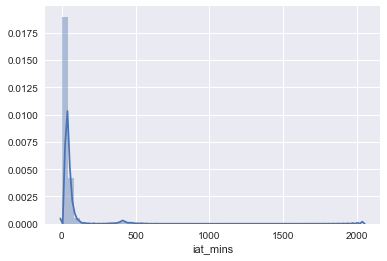

In [118]:
warnings.filterwarnings('ignore')
sns.distplot(iatBOS['iat_mins']);

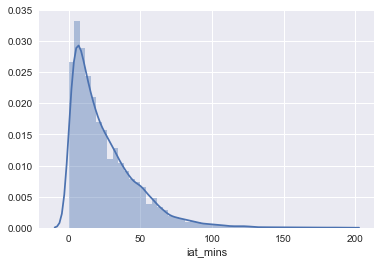

In [119]:
warnings.filterwarnings('ignore')
iatBOSreduced = iatBOS[iatBOS['iat_mins'] <= 200]
sns.distplot(iatBOSreduced['iat_mins'])

In [120]:
iatMCO = MCO.sort_values(by=['arrtime'])
iatMCO['iat'] = iatMCO['arrtime'].diff()

# Get arrival difference time in seconds
iatMCO["iat_seconds"] = iatMCO['iat'].dt.total_seconds()

# Get arrival difference time in minutes
iatMCO["iat_mins"] = iatMCO['iat_seconds']/60

iatMCO.describe().transpose()
iatMCO = iatMCO.dropna()

iatMCO.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
iat,13972,0 days 00:37:36.836530,0 days 01:14:23.796204,0 days 00:00:00,0 days 00:09:00,0 days 00:21:00,0 days 00:40:00,0 days 19:27:00
iat_seconds,13972,2256.84,4463.8,0,540,1260,2400,70020
iat_mins,13972,37.6139,74.3966,0,9,21,40,1167


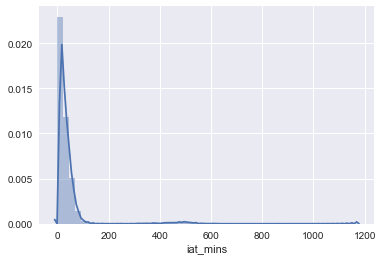

In [121]:
warnings.filterwarnings('ignore')
sns.distplot(iatMCO['iat_mins']);

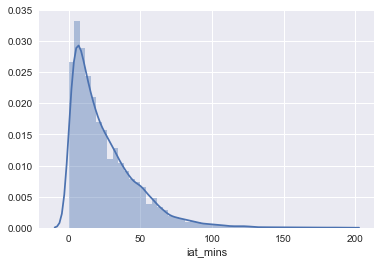

In [122]:
warnings.filterwarnings('ignore')
iatMCOreduced = iatMCO[iatMCO['iat_mins'] <= 200]
sns.distplot(iatBOSreduced['iat_mins'])

In [123]:
print ('ATL: Mean = {0:.3f} and SD = {1:.3f}'.format(float(iatATL[['iat_mins']].mean()), 
                                                     float(iatATL[['iat_mins']].std())))
print ('ORD: Mean = {0:.3f} and SD = {1:.3f}'.format(float(iatORD[['iat_mins']].mean()), 
                                                     float(iatORD[['iat_mins']].std())))
print ('LAX: Mean = {0:.3f} and SD = {1:.3f}'.format(float(iatLAX[['iat_mins']].mean()), 
                                                     float(iatLAX[['iat_mins']].std())))
print ('BOS: Mean = {0:.3f} and SD = {1:.3f}'.format(float(iatBOS[['iat_mins']].mean()), 
                                                     float(iatBOS[['iat_mins']].std())))
print ('MCO: Mean = {0:.3f} and SD = {1:.3f}'.format(float(iatMCO[['iat_mins']].mean()), 
                                                     float(iatMCO[['iat_mins']].std())))

ATL: Mean = 31.118 and SD = 74.814
ORD: Mean = 31.621 and SD = 74.027
LAX: Mean = 32.754 and SD = 70.818
BOS: Mean = 34.960 and SD = 67.597
MCO: Mean = 37.614 and SD = 74.397


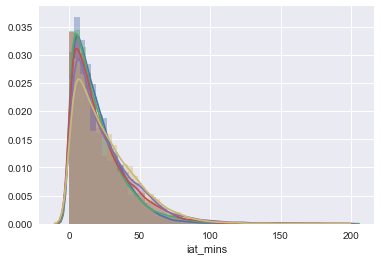

In [124]:
warnings.filterwarnings('ignore')
sns.distplot(iatATLreduced['iat_mins'])
sns.distplot(iatORDreduced['iat_mins'])
sns.distplot(iatLAXreduced['iat_mins'])
sns.distplot(iatBOSreduced['iat_mins'])
sns.distplot(iatMCOreduced['iat_mins'])

(0, 0.04)

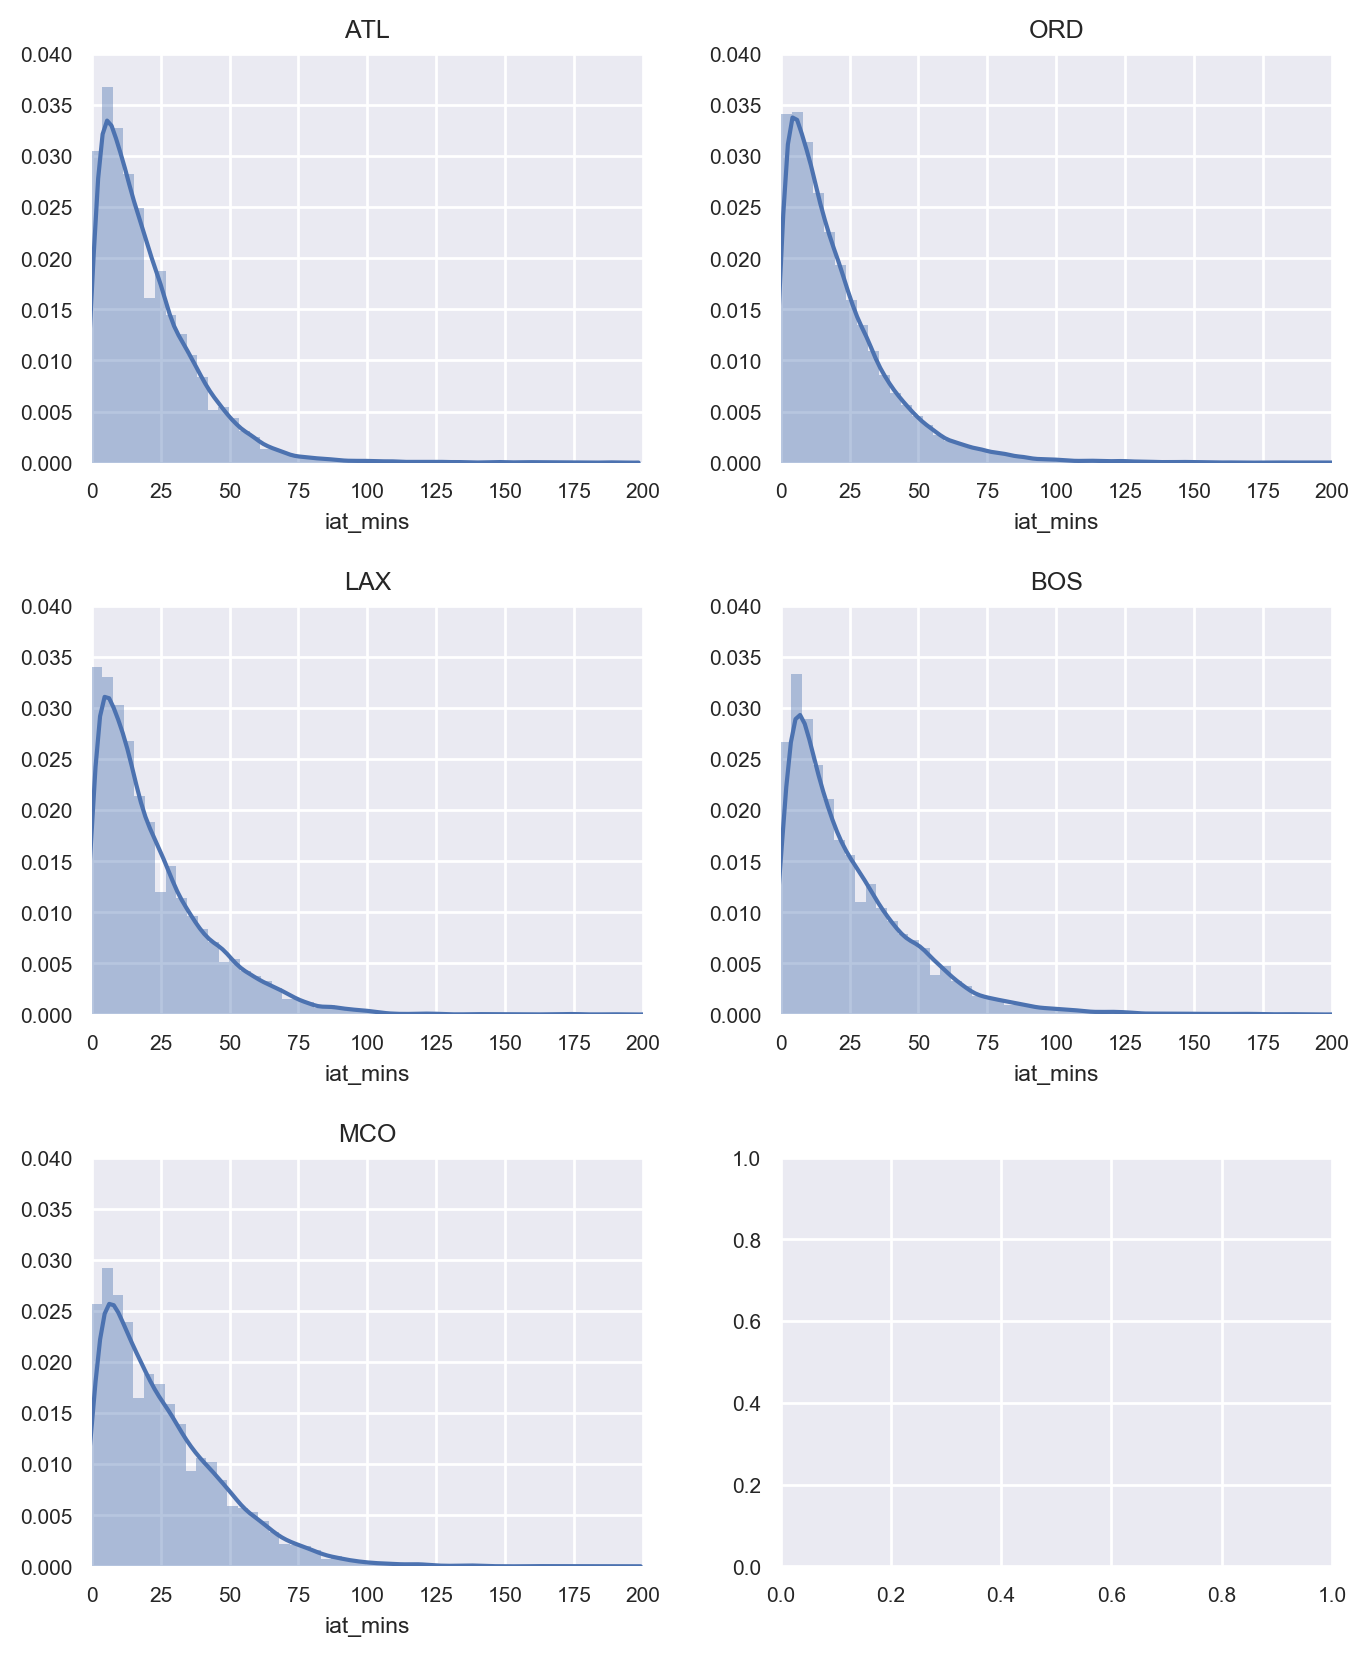

In [143]:
import matplotlib.pyplot as plt
# Effectively using matplotlib -- http://pbpython.com/effective-matplotlib.html
sns.set_context("notebook", font_scale=0.75, rc={"lines.linewidth": 1.5})

fig, axs = plt.subplots(nrows=3,ncols=2, dpi=200)
fig.subplots_adjust(left=None, bottom=None, right=None, top=1.5, wspace=0.25, hspace=0.35)
# https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots-in-matplotlib
# https://stackoverflow.com/questions/15858192/how-to-set-xlim-and-ylim-for-a-subplot-in-matplotlib
#fig.tight_layout() 

sns.distplot(iatATLreduced['iat_mins'], ax=axs[0,0])
axs[0,0].set(title="ATL")
axs[0,0].set_xlim([0, 200]); axs[0,0].set_ylim([0, 0.04])
sns.distplot(iatORDreduced['iat_mins'], ax=axs[0,1])
axs[0,1].set(title="ORD")
axs[0,1].set_xlim([0, 200]); axs[0,1].set_ylim([0, 0.04])
sns.distplot(iatLAXreduced['iat_mins'], ax=axs[1,0])
axs[1,0].set(title="LAX")
axs[1,0].set_xlim([0, 200]); axs[1,0].set_ylim([0, 0.04])
sns.distplot(iatBOSreduced['iat_mins'], ax=axs[1,1]) 
axs[1,1].set(title="BOS")
axs[1,1].set_xlim([0, 200]); axs[1,1].set_ylim([0, 0.04])
sns.distplot(iatMCOreduced['iat_mins'], ax=axs[2,0])
axs[2,0].set(title="MCO")
axs[2,0].set_xlim([0, 200]); axs[2,0].set_ylim([0, 0.04])